In [1]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda:3")

prompt = ["a photo of an astronaut riding a horse on mars"]*4
images = pipe(prompt).images
image = images[0]  
    
#image.save("astronaut_rides_horse.png")

/home/AD/xiw136/anaconda3/envs/ldm/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 91180.52it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:28<00:00,  1.76it/s]


In [2]:
images

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

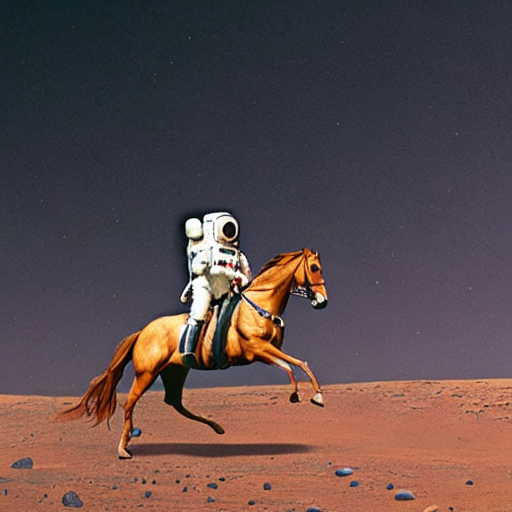

In [5]:
images[0]

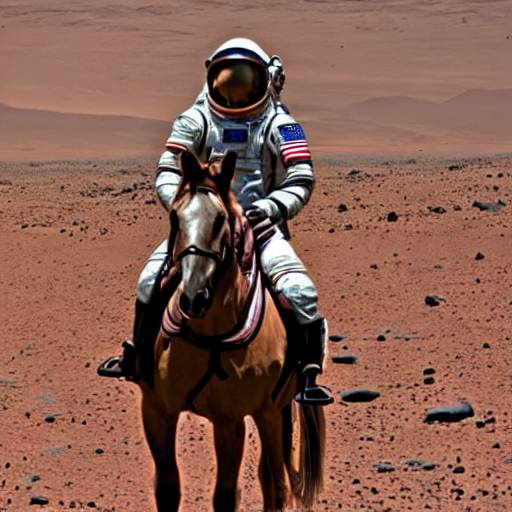

In [6]:
images[1]

In [4]:
pipe.unet.config

FrozenDict([('sample_size', 64),
            ('in_channels', 4),
            ('out_channels', 4),
            ('center_input_sample', False),
            ('flip_sin_to_cos', True),
            ('freq_shift', 0),
            ('down_block_types',
             ['CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'DownBlock2D']),
            ('mid_block_type', 'UNetMidBlock2DCrossAttn'),
            ('up_block_types',
             ['UpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D']),
            ('only_cross_attention', False),
            ('block_out_channels', [320, 640, 1280, 1280]),
            ('layers_per_block', 2),
            ('downsample_padding', 1),
            ('mid_block_scale_factor', 1),
            ('act_fn', 'silu'),
            ('norm_num_groups', 32),
            ('norm_eps', 1e-05),
            ('cross_attention_dim', 768),
            ('a

In [ ]:
pipe

In [ ]:
from diffusers import UNet2DConditionModel
unet = UNet2DConditionModel()

## View dataset

In [29]:
from datasets import load_dataset
dataset = load_dataset('imagefolder', data_dir='./dataset/ffhq256/images/')


Resolving data files: 100%|██████████| 70001/70001 [00:01<00:00, 50192.69it/s] 


Extracting data files: 0it [00:00, ?it/s]


Dataset imagefolder downloaded and prepared to /home/AD/xiw136/.cache/huggingface/datasets/imagefolder/default-9588da85d40737f0/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f. Subsequent calls will reuse this data.


100%|██████████| 1/1 [00:00<00:00,  1.89it/s]


In [30]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'text'],
        num_rows: 70000
    })
})

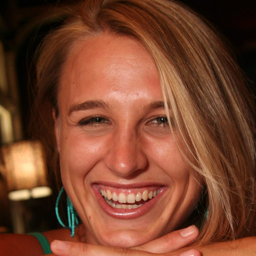

In [33]:
dataset['train'][1]['image']

In [34]:
dataset['train'][1]['text']

'a photography of a woman smiling with her hands on her chin'

In [37]:
from diffusers import UNet2DConditionModel
unet = UNet2DConditionModel()

In [38]:
unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0): Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): Conv2d(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (attn1): CrossAttention(
                (to_q): Linear(in_features=320, out_features=320, bias=False)
                (to_k): Linear(in_features=320, out_features=320, bias=False)
                (to_v): Linear(in_features=320, out_features=320, bias=False)
                (to_out): ModuleList(
                

In [41]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
#unet1 = UNet2DConditionModel.from_pretrained(model_id, torch_dtype=torch.float16)

Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 97997.76it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [45]:
pipe.unet.config

FrozenDict([('sample_size', 64),
            ('in_channels', 4),
            ('out_channels', 4),
            ('center_input_sample', False),
            ('flip_sin_to_cos', True),
            ('freq_shift', 0),
            ('down_block_types',
             ['CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'DownBlock2D']),
            ('mid_block_type', 'UNetMidBlock2DCrossAttn'),
            ('up_block_types',
             ['UpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D']),
            ('only_cross_attention', False),
            ('block_out_channels', [320, 640, 1280, 1280]),
            ('layers_per_block', 2),
            ('downsample_padding', 1),
            ('mid_block_scale_factor', 1),
            ('act_fn', 'silu'),
            ('norm_num_groups', 32),
            ('norm_eps', 1e-05),
            ('cross_attention_dim', 768),
            ('a

In [46]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda:3")

prompt = ["a photo of an astronaut riding a horse on mars"]*4
images = pipe(prompt).images
image = images[0]  
    

Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 54050.31it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:28<00:00,  1.77it/s]


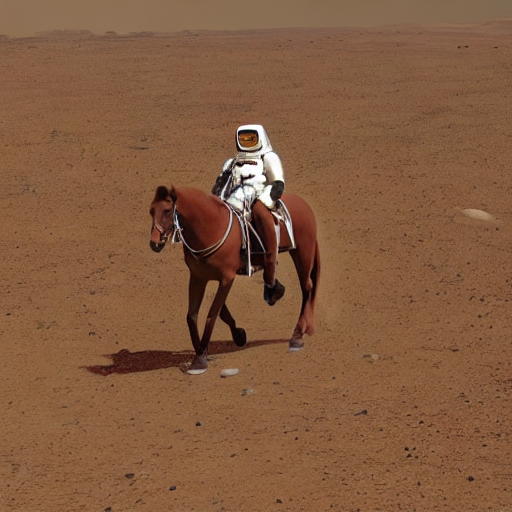

In [47]:
image

In [3]:
import torch
from diffusers import UNet2DConditionModel
from diffusers import StableDiffusionPipeline

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Fetching 15 files: 100%|██████████| 15/15 [00:00<00:00, 102466.71it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [11]:
unet = UNet2DConditionModel(
    sample_size=64,
    in_channels=4,
    out_channels=4,
    down_block_types=('CrossAttnDownBlock2D','CrossAttnDownBlock2D','CrossAttnDownBlock2D','DownBlock2D'),
    mid_block_type= "UNetMidBlock2DCrossAttn",
    up_block_types = ("UpBlock2D", "CrossAttnUpBlock2D", "CrossAttnUpBlock2D", "CrossAttnUpBlock2D"),
    block_out_channels= (320, 640, 1280, 1280),
    cross_attention_dim = 768,
    )

In [5]:
unet = UNet2DConditionModel.from_config(pipe.unet.config)
pipe.unet = unet.half()
pipe = pipe.to('cuda:3')

In [12]:
pipe.unet = unet.half()
pipe = pipe.to('cuda:3')

In [13]:
prompt = ["a photo of an astronaut riding a horse on mars"]*4
images = pipe(prompt).images
image = images[0]  

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:28<00:00,  1.77it/s]
Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


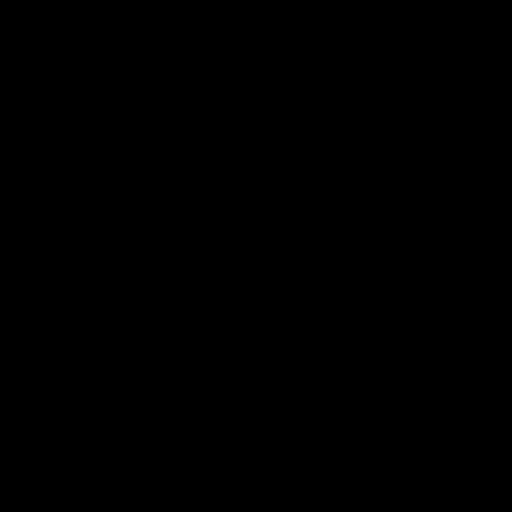

In [14]:
images[3]

In [5]:
from dataclasses import dataclass

@dataclass
class TrainingConfig:
    pretrained_model_name_or_path = "runwayml/stable-diffusion-v1-5"
    resolution = 256  # the generated image resolution
    train_batch_size = 16
    eval_batch_size = 16  # how many images to sample during evaluation
    num_epochs = 5
    gradient_accumulation_steps = 1
    learning_rate = 1e-4
    lr_warmup_steps = 500
    save_image_epochs = 1
    save_model_epochs = 1
    mixed_precision = 'fp16'  # `no` for float32, `fp16` for automatic mixed precision
    train_data_dir = './dataset/ffhq256/images/'
    output_dir = 'checkpoints/ffhq256'  # the model namy locally and on the HF Hub
    logging_dir = 'log'
    overwrite_output_dir = True  # overwrite the old model when re-running the notebook
    seed = 0

args = TrainingConfig()

In [2]:
from datasets import load_dataset
dataset = load_dataset('imagefolder', data_dir='./dataset/ffhq256/images/')
args.dataset_name = 'ffhq256'

Resolving data files:   0%|          | 0/70001 [00:00<?, ?it/s]

Found cached dataset imagefolder (/home/AD/xiw136/.cache/huggingface/datasets/imagefolder/default-9588da85d40737f0/0.0.0/37fbb85cc714a338bea574ac6c7d0b5be5aff46c1862c1989b20e0771199e93f)


  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import transformers
from torchvision import transforms
def main():
            
    preprocess = transforms.Compose(
            [
                transforms.Resize(args.resolution, interpolation=transforms.InterpolationMode.BILINEAR),
                transforms.RandomHorizontalFlip() ,
                transforms.ToTensor(),
                transforms.Normalize([0.5], [0.5]),
            ]
        )

In [ ]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}

dataset.set_transform(transform)

In [ ]:
from diffusers import StableDiffusionPipeline
class StableDiffusionWithCLIPAssistPipeline(StableDiffusionPipeline):
    def __init__(
            self,
            pretrained_model_name_or_path: str = "runwayml/stable-diffusion-v1-5"
    ):
        